### Load in Data

In [7]:
!pip install -U -q PyDrive

In [14]:
import pandas as pd
import numpy as np



In [15]:


df = pd.read_csv('watch_reviews.tsv', sep='\t', header=0, error_bad_lines=False)

b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

In [16]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960204 entries, 0 to 960203
Data columns (total 15 columns):
marketplace          960204 non-null object
customer_id          960204 non-null int64
review_id            960204 non-null object
product_id           960204 non-null object
product_parent       960204 non-null int64
product_title        960202 non-null object
product_category     960204 non-null object
star_rating          960204 non-null int64
helpful_votes        960204 non-null int64
total_votes          960204 non-null int64
vine                 960204 non-null object
verified_purchase    960204 non-null object
review_headline      960200 non-null object
review_body          960056 non-null object
review_date          960200 non-null object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [18]:
print('Num of rows: ' + str(df.shape[0])) #row count
print('Num of columns: ' + str(df.shape[1])) #column count

Num of rows: 960204
Num of columns: 15


In [19]:
df.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          2
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline        4
review_body          148
review_date            4
dtype: int64

the columne "Review Body" contains the detialed Review. it has a very small number of missing value comparing to the large sample. so i am going to drop the missing value and take 1000 subsample as training data

In [20]:
df.review_body.dropna(inplace = True)

In [25]:
data = df.loc[:1000, 'review_body'].tolist()

In [41]:
data[:3]

['Absolutely love this watch! Get compliments almost every time I wear it. Dainty.',
 'I love this watch it keeps time wonderfully.',
 'Scratches']

### Data Preprocessing - Tokenizing and Stemming

In [38]:
# load stopwords
import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
print('We use ' + str(len(stopwords)) + ' stop words from nltk library')
print(stopwords[:10])


We use 179 stop words from nltk library
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [64]:

from nltk.stem.snowball import SnowballStemmer
import re

stemmer = SnowballStemmer('english')

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)if word  not in stopwords]
    
    filtered_tokens = []
    
    #filter out any tokens not containing letters (e.g. numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
    
#tokenization only
def tokenization(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word  not in stopwords]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens


In [65]:
tokenization_and_stemming(data[0])

['absolut',
 'love',
 'watch',
 'get',
 'compliment',
 'almost',
 'everi',
 'time',
 'i',
 'wear',
 'dainti']

In [68]:
tokenization(data[0])

['absolutely',
 'love',
 'watch',
 'get',
 'compliments',
 'almost',
 'every',
 'time',
 'i',
 'wear',
 'dainty']

In [66]:
# apply tokenization and stemming for all the documents

docs_stemmed = []
docs_tokenized = []
for i in data:
    tokenized_and_stemmed_results = tokenization_and_stemming(i)
    docs_stemmed.extend(tokenized_and_stemmed_results)
    
    tokenized_results = tokenization(i)
    docs_tokenized.extend(tokenized_results)

In [79]:
len(set(docs_stemmed))

2554

In [69]:
#create a mapping from stemmed words to original words
vocab_frame_dict = {docs_stemmed[x]: docs_tokenized[x] for x in range(len(docs_stemmed))}

In [73]:
# TF-IDF
#keep 1000 words
#exclude the words show up in all documents or only in 1 document
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(data) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " reviews and " + str(tfidf_matrix.shape[1]) + " terms.")

In total, there are 1000 reviews and 245 terms.


In [75]:
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.99,
 'max_features': 1000,
 'min_df': 0.01,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_and_stemming>,
 'use_idf': True,
 'vocabulary': None}

In [76]:
# words
tf_selected_words = tfidf_model.get_feature_names()
tf_selected_words 

["'m",
 "'s",
 'abl',
 'absolut',
 'accur',
 'actual',
 'adjust',
 'alarm',
 'alreadi',
 'alway',
 'amaz',
 'amazon',
 'anoth',
 'arm',
 'arriv',
 'automat',
 'awesom',
 'bad',
 'band',
 'batteri',
 'beauti',
 'best',
 'better',
 'big',
 'bit',
 'black',
 'blue',
 'bought',
 'box',
 'br',
 'bracelet',
 'brand',
 'break',
 'bright',
 'broke',
 'button',
 'buy',
 'ca',
 'came',
 'case',
 'casio',
 'chang',
 'cheap',
 'clasp',
 'classi',
 'clock',
 'color',
 'come',
 'comfort',
 'compliment',
 'cool',
 'cost',
 'crown',
 'crystal',
 'dark',
 'date',
 'daughter',
 'day',
 'deal',
 'definit',
 'deliveri',
 'design',
 'dial',
 'differ',
 'difficult',
 'disappoint',
 'display',
 'dress',
 'durabl',
 'easi',
 'easili',
 'end',
 'everi',
 'everyday',
 'everyth',
 'exact',
 'excel',
 'expect',
 'expens',
 'face',
 'fair',
 'far',
 'fast',
 'featur',
 'feel',
 'fell',
 'fine',
 'finish',
 'fit',
 'function',
 'gave',
 'gift',
 'gold',
 'good',
 'got',
 'great',
 'hand',
 'happi',
 'hard',
 'heavi

#### How similar documents are?

In [80]:
# use cosine similarity to check the similarity for two documents
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = cosine_similarity(tfidf_matrix)
print (cos_matrix)

[[ 1.          0.42500259  0.         ...,  0.          0.0400497   0.        ]
 [ 0.42500259  1.          0.         ...,  0.          0.09423401  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.          0.          0.        ]
 [ 0.0400497   0.09423401  0.         ...,  0.          1.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          1.        ]]


### Model I Kmeans

In [93]:
from sklearn.cluster import KMeans

# find k
K = 50
costs = []
for n in range(2,K):
    km = KMeans(n_clusters = n)
    km.fit(tfidf_matrix)
    
    costs.append(km.inertia_)
    #print('When # Clusters is ' + str(n) + ', The cost is ' + str(km.inertia_))
    
    


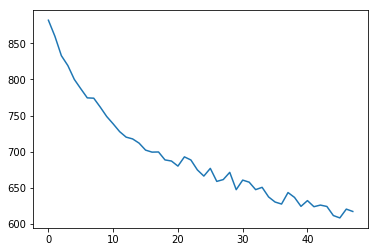

In [94]:
import matplotlib.pyplot as plt

plt.plot(costs)
plt.show()

Use Number_clusters = 10

In [95]:
num_clusters = 10

# number of clusters
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

#### Analyze K-means Result

In [96]:
product = {'review': df[:1000].product_title, 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['review', 'cluster'])

In [98]:
frame[frame['cluster'] == 5].head()

,review,cluster
0,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",5
1,Kenneth Cole New York Women's KC4944 Automatic...,5
5,Casio Men's GW-9400BJ-1JF G-Shock Master of G ...,5
35,Domire Fashion Accessories Trial Order New Qua...,5
43,Batman Kids' BAT4072 Black Rubber Batman Logo ...,5


In [101]:
print('Number of reviews included in each cluster:')
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
9,271
0,237
5,95
1,64
4,60
8,58
3,58
2,58
7,53
6,46


In [119]:
print('<Document clustering result by K-means>')

order_centroids = km.cluster_centers_.argsort()[:,::-1]

cluster_keywords_summary = {}
for i in range(num_clusters):
    print("Cluster " + str(i) + "words:", end='')
    cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]:
        cluster_keywords_summary[i].append(vocab_frame_dict[tf_selected_words[ind] ])
        print(vocab_frame_dict[tf_selected_words[ind]] + ',', end=' ')
        
    print()
    
    cluster_reviews = frame[frame.cluster == i].review.tolist()
    print('Cluster ' + str(i) + ' reviews (' + str(len(cluster_reviews)) + ' reviews): ')
    print(', '.join(cluster_reviews))
    print()


<Document clustering result by K-means>
Cluster 0words:excellent, perfect, expected, product, awesome, 's, 
Cluster 0 reviews (237 reviews): 
Ritche 22mm Black Stainless Steel Bracelet Watch Band Strap Pebble Time/Pebble Classic, Bulova Men's 98B143 Precisionist Charcoal Grey Dial Bracelet Watch, Anne Klein Women's 109271MPTT Swarovski Crystal Accented Two-Tone Multi-Chain Bracelet Watch, Timex Women's Q7B860 Padded Calfskin 8mm Black Replacement Watchband, Movado Men's 0606545 "Museum" Perforated Black-Rubber Strap Sport Watch, Invicta Men's 6674 Corduba Chronograph Black Dial Polyurethane Watch, Casio F-108WH-2AEF Mens Blue Digital Watch, Motorola Moto 360 Modern Timepiece Smart Watch - Black Leather 00418NARTL, Invicta Men's 15256 I-Force Gunmetal Ion-Plated Stainless Steel Watch with Black Leather Strap, TS6202BLK 8 Belt Box Organizer Black Leather XL Compartments, U.S. Polo Assn. Sport Men's US9506 Analog-Digital Display Silver-Tone Watch with Textured Band, Motorola Moto 360 Mode

### Model II Topic Modeling Latent Dirichlet Allocation

In [138]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method = 'online')

In [139]:
from sklearn.feature_extraction.text import CountVectorizer
# LDA only in take integers
tfidf_model_lda = CountVectorizer(max_df=0.99, max_features=500,
                                 min_df=0.01, stop_words='english',
                                 tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix_lda = tfidf_model_lda.fit_transform(data) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix_lda.shape[0]) + \
      " reviews and " + str(tfidf_matrix_lda.shape[1]) + " terms.")

In total, there are 1000 reviews and 245 terms.


In [140]:
# train the model
lda_output = lda.fit_transform(tfidf_matrix_lda)
print(lda_output.shape)
print(lda_output)

(1000, 5)
[[ 0.02502571  0.02553809  0.75421072  0.02600947  0.16921601]
 [ 0.05010251  0.05080297  0.79739902  0.05118076  0.05051474]
 [ 0.2         0.2         0.2         0.2         0.2       ]
 ..., 
 [ 0.59779707  0.1000729   0.10036261  0.10000021  0.10176721]
 [ 0.050095    0.48654172  0.3612127   0.05080224  0.05134833]
 [ 0.03352145  0.03399754  0.63984109  0.25930085  0.03333907]]


In [141]:
# topic and word matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 245)
[[   0.27246351    1.36876618    1.49951733 ...,    0.20456024
    10.55558931    0.22413179]
 [  25.66173843  104.16791583   14.23406892 ...,    0.22406339
    34.24424235   15.03619665]
 [  19.11620648  121.51201638    0.22485313 ...,    6.93480284
    21.76475412   39.83083562]
 [   2.84305266    5.22085381    0.21717838 ...,   10.33609994
     4.32378323    0.23351079]
 [   0.26399869    0.23891201    0.2031837  ...,    0.2046893     0.21437575
     0.20477958]]


In [142]:
# reformat the output matrix

topic_names = ['Topic' + str(i) for i in range(lda.n_components)]

doc_names = ['Doc' + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns = topic_names, index = doc_names)

topic = np.argmax(df_document_topic.values, axis = 1)
df_document_topic['Dominent_Topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,Dominent_Topic
Doc0,0.03,0.03,0.75,0.03,0.17,2
Doc1,0.05,0.05,0.80,0.05,0.05,2
Doc2,0.20,0.20,0.20,0.20,0.20,0
Doc3,0.03,0.03,0.03,0.88,0.03,3
Doc4,0.24,0.30,0.45,0.01,0.01,2
Doc5,0.04,0.04,0.84,0.04,0.04,2
Doc6,0.03,0.03,0.88,0.03,0.03,2
Doc7,0.03,0.88,0.03,0.03,0.03,1
Doc8,0.01,0.56,0.01,0.40,0.01,1
Doc9,0.02,0.92,0.02,0.02,0.02,1


In [143]:
df_document_topic.Dominent_Topic.value_counts().to_frame()

,Dominent_Topic
2,404
1,280
3,122
0,112
4,82


In [145]:
# reformat topic word matrix

df_topic_words = pd.DataFrame(lda.components_)

df_topic_words.columns = tfidf_model_lda.get_feature_names()
df_topic_words.index = topic_names

df_topic_words

,'m,'s,abl,absolut,accur,actual,adjust,alarm,alreadi,alway,...,weight,went,wife,wind,wish,work,worn,worth,wrist,year
Topic0,0.272464,1.368766,1.499517,0.201968,0.207850,0.203033,0.209825,0.300287,0.201501,0.211823,...,0.260433,0.208148,0.201728,1.082964,8.787011,13.925477,0.203792,0.204560,10.555589,0.224132
Topic1,25.661738,104.167916,14.234069,0.991543,7.571041,5.613886,8.314860,0.213502,0.209686,6.306562,...,9.516374,8.776156,0.221009,0.291591,0.249176,10.663478,8.472577,0.224063,34.244242,15.036197
Topic2,19.116206,121.512016,0.224853,0.210463,4.857151,4.643323,13.572722,14.524230,12.956628,0.219572,...,3.350004,4.347979,19.717845,0.204221,2.658769,81.235592,2.818908,6.934803,21.764754,39.830836
Topic3,2.843053,5.220854,0.217178,0.206322,0.205279,5.798012,0.211571,0.241653,0.209635,6.815369,...,1.832857,0.218379,0.238996,12.524306,0.210060,25.686071,1.691481,10.336100,4.323783,0.233511
Topic4,0.263999,0.238912,0.203184,15.826245,0.206232,0.205298,2.211088,2.272832,0.203573,0.203530,...,0.201732,0.207401,0.208325,0.201761,0.209125,0.227911,0.202153,0.204689,0.214376,0.204780


In [147]:
tfidf_model_lda.get_feature_names() = 

False

In [163]:
# print top n keywords for each topic
words = np.array(tfidf_model_lda.get_feature_names())
n_words = 15
topic_words = []
for topic_word_weights in lda.components_:
    #print(topic_word_weights)
    top_words = topic_word_weights.argsort()[::-1][:n_words]
    topic_words.append(words.take(top_words))
    #print('loop'+str(i)+str(topic_words))
    
    

In [164]:
df_topic_words = pd.DataFrame(topic_words)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic ' + str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,good,br,band,far,link,featur,watch,use,size,display,remov,comfort,look,function,timex
Topic 1,watch,br,look,n't,great,'s,band,like,time,wear,hand,second,perfect,qualiti,buy
Topic 2,watch,love,nice,'s,look,work,time,great,realli,wear,read,face,band,like,good
Topic 3,watch,beauti,time,n't,expect,color,gift,day,want,work,make,look,purchas,dial,differ
Topic 4,product,excel,good,like,ship,fast,qualiti,seller,pleas,thank,price,absolut,deliveri,great,packag
